In [75]:
%run SetupNSTNetworks.py
%run TrainNSTNetworks.py


cuda


In [76]:
style_img = image_loader("/home/andy/NST/Tutorial/LF1.jpg")
content_img = image_loader("/home/andy/NST/Tutorial/hat_square.jpg")
input_img = content_img.clone()
print(style_img.size(), " ", content_img.size())

assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

cnn, cnn_normalization_mean, cnn_normalization_std, content_layers, style_layers, style_weight = setup_SqueezeNet()

torch.Size([1, 3, 512, 512])   torch.Size([1, 3, 512, 512])


Building the style transfer model..
1 Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
2 ReLU(inplace=True)
3 MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
4 Fire(
  (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
  (squeeze_activation): ReLU(inplace=True)
  (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
  (expand1x1_activation): ReLU(inplace=True)
  (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (expand3x3_activation): ReLU(inplace=True)
)
5 Fire(
  (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
  (squeeze_activation): ReLU(inplace=True)
  (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
  (expand1x1_activation): ReLU(inplace=True)
  (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (expand3x3_activation): ReLU(inplace=True)
)
6 Fire(
  (squeeze): Conv2d(128, 32, kernel_size=(1, 1), stride=(1, 1))
  (squeeze_activation): ReLU(inplace=Tr

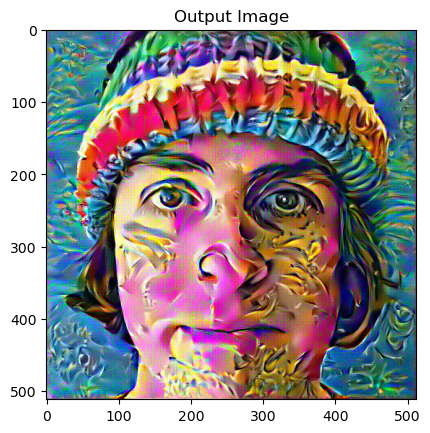

In [77]:
output, model = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, content_layers, style_layers,
                            style_weight=style_weight, num_steps=300)

plt.figure()
imshow(input_img, title='Output Image')

In [78]:
save_out = transforms.functional.to_pil_image(input_img.squeeze())
save_out.save("LFMe5.jpg")